In [1]:
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
X_moons, y_moons = make_moons(n_samples=1000, noise = 0.4, random_state = 42)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons,y_moons, test_size = 0.2, random_state = 42)

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(min_samples_leaf = 10,max_depth=4, criterion='gini', random_state=42)
tree_clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

In [15]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

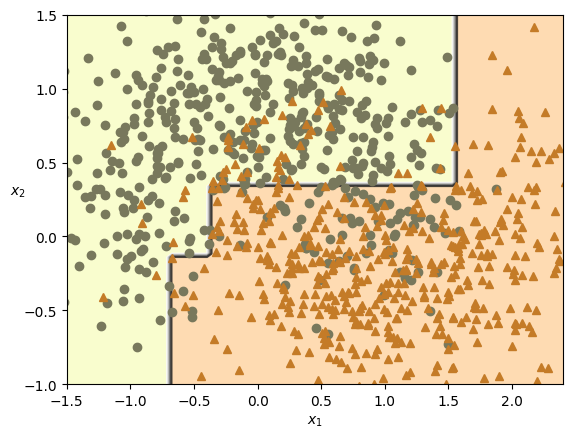

In [29]:
plot_decision_boundary(tree_clf, X_moons,y_moons, axes=[-1.5,2.4,-1,1.5], cmap="Wistia")
plt.show()

In [30]:
tree_clf.score(X_test,y_test)

0.855

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distrib = {
    'max_depth': randint(low=1, high = 100),
    'min_samples_leaf': randint(low=1, high=1000),
    'min_samples_split': randint(low=2, high=1000),
    'max_leaf_nodes': randint(low=2,high = 1000)
}

In [51]:
rnd_search = RandomizedSearchCV(estimator = tree_clf, param_distributions=param_distrib,
                                n_iter = 15, cv=5,
                                random_state=42)

In [52]:
rnd_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=4,
                                                    min_samples_leaf=10,
                                                    random_state=42),
                   n_iter=15,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4ffe412250>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4ffa0c3f50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4ffe0897d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4ffe065c10>},
                   random_state=42)

In [53]:
rnd_search.best_params_

{'max_depth': 52,
 'max_leaf_nodes': 862,
 'min_samples_leaf': 271,
 'min_samples_split': 108}

In [63]:
model = rnd_search.best_estimator_

In [64]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8

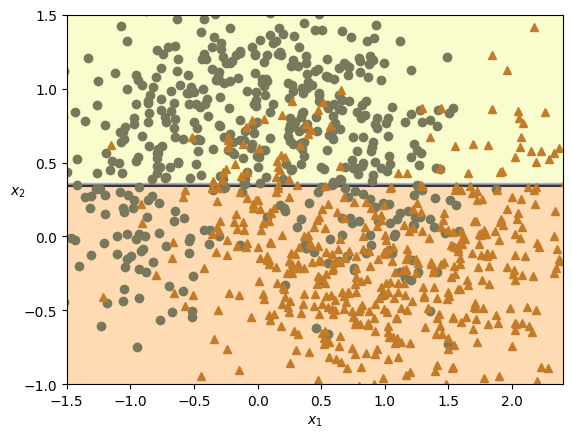

In [65]:
plot_decision_boundary(model, X_moons,y_moons, axes=[-1.5,2.4,-1,1.5], cmap="Wistia")
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': list(range(2,6)),
    'min_samples_leaf': list(range(2,50)),
    'min_samples_split': list(range(5,50))
}

In [58]:
grid_search = GridSearchCV(estimator = tree_clf, param_grid = param_grid,
                           cv=5)

In [59]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                              random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, 31, ...],
                         'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                               14, 15, 16, 17, 18, 19, 20, 21,
                                               22, 23, 24, 25, 26, 27, 28, 29,
                                               30, 31, 32, 33, 34, ...]})

In [60]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 26, 'min_samples_split': 5}

In [61]:
model = grid_search.best_estimator_

model.score(X_test,y_test)

0.84

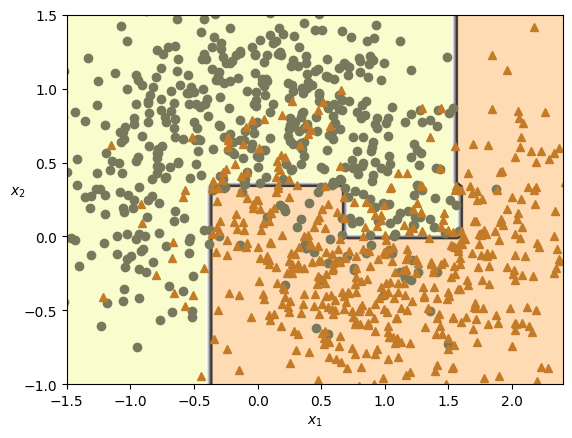

In [62]:
plot_decision_boundary(model, X_moons,y_moons, axes=[-1.5,2.4,-1,1.5], cmap="Wistia")
plt.show()